The following example shows how you can use pytesmo to calculate climatology/anomaly
time series. Here we use the test data that is provided within this package.

Import all necessary dependencies:

In [19]:
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore') # some import warnings are expected and ignored
    # install the ascat package first https://github.com/TUW-GEO/ascat
    from ascat.read_native.cdr import AscatSsmCdr 
from pytesmo.time_series import anomaly as ts_anom

import os

from pytesmo import testdata_path


Set up reading ascat data (from pytesmo test data, make sure to clone it!)

In [20]:
ascat_data_folder = os.path.join(testdata_path, 'sat', 'ascat', 'netcdf', '55R22')
ascat_grid_folder = os.path.join(testdata_path, 'sat', 'ascat', 'netcdf', 'grid')
static_layers_folder = os.path.join(testdata_path, 'sat', 'h_saf', 'static_layer')
#init the AscatSsmCdr reader with the paths
with warnings.catch_warnings():
    warnings.filterwarnings('ignore') # some warnings are expected and ignored

    ascat_reader = AscatSsmCdr(ascat_data_folder, ascat_grid_folder,
                               grid_filename='TUW_WARP5_grid_info_2_1.nc',
                               static_layer_path=static_layers_folder)

Read ASCAT SSM at one location (nearest neighbour lookup). Plot time series:

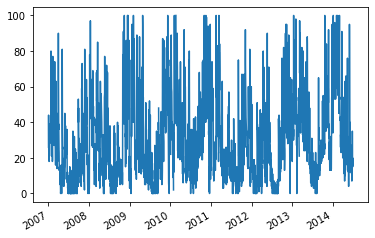

In [21]:
ascat_ts = ascat_reader.read(11.82935429,45.4731369)
# plot soil moisture
ascat_ts.data['sm'].plot()

Calculate anomaly based on moving +- 17 day window:

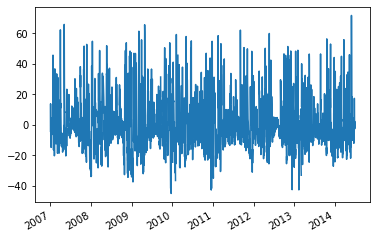

In [22]:
anomaly = ts_anom.calc_anomaly(ascat_ts.data['sm'], window_size=35)
anomaly.plot()

Calculate climatology:

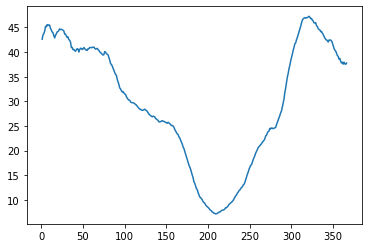

In [23]:
climatology = ts_anom.calc_climatology(ascat_ts.data['sm'])
climatology.plot()

Calculate anomaly based on climatology:

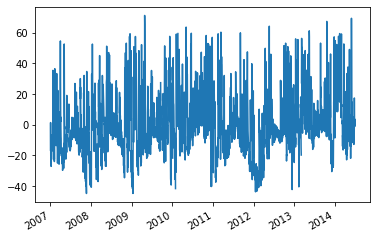

In [24]:
anomaly_clim = ts_anom.calc_anomaly(ascat_ts.data['sm'], climatology=climatology)
anomaly_clim.plot()